# Large_Scale_Preprocessing(대용량 이미지 전처리)

## Download Dataset(캐글에서 데이터셋 다운로드받기)
https://www.kaggle.com/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# 캐글 설치
!pip install -q kaggle

- kaggle.json 파일이 현재 content 경로에 있음
- root/.kaggle 폴더로 이동시켜줘야 함
--------------------------------
- root는 ~로 표시함
- .kaggle폴더는 없기 때문에 우리가 직접 만들어줘야함

In [8]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
# !cp '/content/drive/MyDrive/LectureSpace/OpenDateset/kaggle.json ~/.kaggle/'
!cp /content/drive/MyDrive/dataset/kaggle.json ~/.kaggle/
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


- root 경로에 .kaggle폴더가 잘 만들어졌는지 확인하고 싶다면
- root경로의 목록에 .kaggle폴더가 있는지 확인만 하면 됨
-----------
1) root경로로 이동 (cd ~)   
2) root 경로의 목록을 확인 (!ls -a)

In [9]:
!pwd

/content


명령어 정리
- !명령어 : 실행 시에만 적용 - 일회성 용도의 명령어들 사용 (다운로드, unzip, 경로 확인)
- %명령어 : 실행 이후에도 적용 유지(현재 경로 이동)

*둘 명령어는 같은 수준의 명령이 아님.
!는 시스템 상에서 명령, %는 ipython 환경에서 명령

In [10]:
# 경로 이동 (~:루트경로로 이동)
%cd ~

/root


In [11]:
!pwd

/root


In [12]:
!ls -a # 해당 경로 목록 전부(-a: 숨김파일까지) 확인

.   .bashrc  .config   .julia	 .kaggle  .launchpadlib  .npm	   .tmux.conf
..  .cache   .ipython  .jupyter  .keras   .local	 .profile  .wget-hsts


In [13]:
!ls ~/.kaggle -al # 해당 경로 목록 상세정보까지(-al: 권한정보, 날짜) 확인

total 16
drwxr-xr-x 2 root root 4096 Jun  5 08:09 .
drwx------ 1 root root 4096 Jun  5 08:09 ..
-rw------- 1 root root   66 Jun  5 08:09 kaggle.json


In [14]:
# 파일 권한 변경 : 읽기, 쓰기, 실행 (rwx)
!chmod 600 ~/.kaggle/kaggle.json # 110 000 000

In [15]:
# 권한 변경 확인
!ls ~/.kaggle -al

total 16
drwxr-xr-x 2 root root 4096 Jun  5 08:09 .
drwx------ 1 root root 4096 Jun  5 08:09 ..
-rw------- 1 root root   66 Jun  5 08:09 kaggle.json


1) 파일권한 : 읽기, 쓰기, 실행 (rwx)  
2) 대상 : 소유자, 소유그룹, others  
3) 권한 표시 : 2진법을 8진법으로  
- 권한부여는 1, x는 0
- rwx 모두 부여는 111 -> 7
- rwx 모두 미부여는 000 -> 0


In [16]:
%cd /content

/content


In [17]:
!ls

drive  sample_data


In [103]:
!pwd

/content


In [18]:
#downloading dataset
!kaggle datasets download -d prasunroy/natural-images

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
 73% 250M/342M [00:02<00:01, 77.4MB/s]
100% 342M/342M [00:02<00:00, 120MB/s] 


In [19]:
!unzip -q natural-images.zip

## Load datasets

In [20]:
import os

import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

from sklearn.model_selection import train_test_split

In [21]:
folder_path = '/content/natural_images'
label_names = os.listdir(folder_path)
label_names

['cat', 'flower', 'car', 'dog', 'fruit', 'motorbike', 'airplane', 'person']

In [22]:
os.listdir(folder_path + '/airplane')

['airplane_0061.jpg',
 'airplane_0666.jpg',
 'airplane_0150.jpg',
 'airplane_0592.jpg',
 'airplane_0589.jpg',
 'airplane_0331.jpg',
 'airplane_0476.jpg',
 'airplane_0649.jpg',
 'airplane_0536.jpg',
 'airplane_0622.jpg',
 'airplane_0136.jpg',
 'airplane_0099.jpg',
 'airplane_0619.jpg',
 'airplane_0645.jpg',
 'airplane_0153.jpg',
 'airplane_0053.jpg',
 'airplane_0201.jpg',
 'airplane_0109.jpg',
 'airplane_0516.jpg',
 'airplane_0608.jpg',
 'airplane_0065.jpg',
 'airplane_0045.jpg',
 'airplane_0324.jpg',
 'airplane_0051.jpg',
 'airplane_0151.jpg',
 'airplane_0312.jpg',
 'airplane_0268.jpg',
 'airplane_0004.jpg',
 'airplane_0228.jpg',
 'airplane_0224.jpg',
 'airplane_0358.jpg',
 'airplane_0107.jpg',
 'airplane_0632.jpg',
 'airplane_0131.jpg',
 'airplane_0461.jpg',
 'airplane_0425.jpg',
 'airplane_0457.jpg',
 'airplane_0257.jpg',
 'airplane_0704.jpg',
 'airplane_0333.jpg',
 'airplane_0486.jpg',
 'airplane_0200.jpg',
 'airplane_0470.jpg',
 'airplane_0123.jpg',
 'airplane_0269.jpg',
 'airplane

In [18]:
# car 폴더에 있는 파일들의 절대경로를 리스트에 저장해보세요.
car_filepaths = []

car_filenames = os.listdir('/content/natural_images/car')
car_filenames

for car_filename in car_filenames:
    car_filepaths.append('/content/natural_images/car/'+car_filename)
car_filepaths

['/content/natural_images/car/car_0572.jpg',
 '/content/natural_images/car/car_0384.jpg',
 '/content/natural_images/car/car_0319.jpg',
 '/content/natural_images/car/car_0183.jpg',
 '/content/natural_images/car/car_0299.jpg',
 '/content/natural_images/car/car_0416.jpg',
 '/content/natural_images/car/car_0762.jpg',
 '/content/natural_images/car/car_0675.jpg',
 '/content/natural_images/car/car_0276.jpg',
 '/content/natural_images/car/car_0785.jpg',
 '/content/natural_images/car/car_0901.jpg',
 '/content/natural_images/car/car_0942.jpg',
 '/content/natural_images/car/car_0795.jpg',
 '/content/natural_images/car/car_0553.jpg',
 '/content/natural_images/car/car_0144.jpg',
 '/content/natural_images/car/car_0806.jpg',
 '/content/natural_images/car/car_0126.jpg',
 '/content/natural_images/car/car_0833.jpg',
 '/content/natural_images/car/car_0250.jpg',
 '/content/natural_images/car/car_0938.jpg',
 '/content/natural_images/car/car_0590.jpg',
 '/content/natural_images/car/car_0765.jpg',
 '/content

In [25]:
import os

# airplane_filename = os.listdir('/content/natural_images/airplane')
car_filename = os.listdir('/content/natural_images/car')
cat_filename = os.listdir('/content/natural_images/cat')
dog_filename = os.listdir('/content/natural_images/dog')
# flower_filename = os.listdir('/content/natural_images/flower')
fruit_filename = os.listdir('/content/natural_images/fruit')
motorbike_filename = os.listdir('/content/natural_images/motorbike')
# person_filename = os.listdir('/content/natural_images/person')

dataset = {
    # 'airplane': [f'/content/natural_images/airplane/{file}' for file in airplane_filename],
    'car': [f'/content/natural_images/car/{file}' for file in car_filename],
    'cat': [f'/content/natural_images/cat/{file}' for file in cat_filename],
    'dog': [f'/content/natural_images/dog/{file}' for file in dog_filename],
    #'flower': [f'/content/natural_images/flower/{file}' for file in flower_filename],
    'fruit': [f'/content/natural_images/fruit/{file}' for file in fruit_filename],
    'motorbike': [f'/content/natural_images/motorbike/{file}' for file in motorbike_filename],
    #'person': [f'/content/natural_images/person/{file}' for file in person_filename]
}
dataset

{'car': ['/content/natural_images/car/car_0572.jpg',
  '/content/natural_images/car/car_0384.jpg',
  '/content/natural_images/car/car_0319.jpg',
  '/content/natural_images/car/car_0183.jpg',
  '/content/natural_images/car/car_0299.jpg',
  '/content/natural_images/car/car_0416.jpg',
  '/content/natural_images/car/car_0762.jpg',
  '/content/natural_images/car/car_0675.jpg',
  '/content/natural_images/car/car_0276.jpg',
  '/content/natural_images/car/car_0785.jpg',
  '/content/natural_images/car/car_0901.jpg',
  '/content/natural_images/car/car_0942.jpg',
  '/content/natural_images/car/car_0795.jpg',
  '/content/natural_images/car/car_0553.jpg',
  '/content/natural_images/car/car_0144.jpg',
  '/content/natural_images/car/car_0806.jpg',
  '/content/natural_images/car/car_0126.jpg',
  '/content/natural_images/car/car_0833.jpg',
  '/content/natural_images/car/car_0250.jpg',
  '/content/natural_images/car/car_0938.jpg',
  '/content/natural_images/car/car_0590.jpg',
  '/content/natural_images/

In [24]:
# 카테고리별로 이미지파일 경로 리스트 사전 만들기
# keys : 카테고리명
# values : 리스트 of 이미지 경로들


dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

for label in os.listdir(folder_path):
    # sub_path = folder_path+'/'+label+'/'
    sub_path = f'{folder_path}/{label}/' # 예시 : /content/natural~/airplaine

    dataset[label] = [] # dataset = {'motorbike' : []}
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'cat': ['/content/natural_images/cat/cat_0882.jpg',
  '/content/natural_images/cat/cat_0811.jpg',
  '/content/natural_images/cat/cat_0582.jpg',
  '/content/natural_images/cat/cat_0643.jpg',
  '/content/natural_images/cat/cat_0302.jpg',
  '/content/natural_images/cat/cat_0177.jpg',
  '/content/natural_images/cat/cat_0012.jpg',
  '/content/natural_images/cat/cat_0155.jpg',
  '/content/natural_images/cat/cat_0518.jpg',
  '/content/natural_images/cat/cat_0188.jpg',
  '/content/natural_images/cat/cat_0808.jpg',
  '/content/natural_images/cat/cat_0399.jpg',
  '/content/natural_images/cat/cat_0406.jpg',
  '/content/natural_images/cat/cat_0681.jpg',
  '/content/natural_images/cat/cat_0428.jpg',
  '/content/natural_images/cat/cat_0741.jpg',
  '/content/natural_images/cat/cat_0456.jpg',
  '/content/natural_images/cat/cat_0858.jpg',
  '/content/natural_images/cat/cat_0371.jpg',
  '/content/natural_images/cat/cat_0881.jpg',
  '/content/natural_images/cat/cat_0383.jpg',
  '/content/natural_images/

## Resize with padding

In [26]:
#label2index = {'airplane' : 0, 'car' : 1 , 'cat' : 2 , 'dog' : 3,
#               'flower' : 4, 'fruit' : 5, 'motorbike' : 6, 'person' : 7}
label2index = {'car' : 0 , 'cat' : 1, 'dog' : 2, 'fruit' : 3, 'motorbike' : 4}

images, labels = [], []

In [27]:
# 이미지 리사이즈
# 1. 이미지 하나씩 읽어들여서
# 2. 리사이즈한 다음 (이미지 리사이즈 함수)
# 3. images, labels 생성
import cv2
import numpy as np
import os

def resize_img(dataset_dict, label_mapping, img_size=112):
    images = []
    labels = []

    for label_name, img_paths in dataset_dict.items():
    # 현재 카테고리에 대한 정수형 레이블을 가져옵니다.
        label = label_mapping[label_name]
        for path in img_paths:
            try:
                # cv2를 사용하여 이미지를 읽습니다.
                img = cv2.imread(path)
                # BGR을 RGB로 변환합니다 (cv2는 기본적으로 BGR로 읽습니다).
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # cv2를 사용하여 이미지 크기를 조정합니다.
                img_resized = cv2.resize(img, (img_size, img_size))
                images.append(img_resized)
                labels.append(label)
            except Exception as e:
                print(f"Error loading or resizing image {path}: {e}")

    return np.array(images), np.array(labels)

# Call the correctly defined function with the dataset and label mapping
images, labels = resize_img(dataset, label2index, img_size=112)


In [28]:
images.shape

(4343, 112, 112, 3)

In [29]:
# 이미지 Resizing 완료
import os
import cv2

def resize_and_save(dataset_dict, label_mapping, img_size=112, save_dir='resized_images'):
    os.makedirs(save_dir, exist_ok=True)  # 저장 폴더 생성

    for label_name, img_paths in dataset_dict.items():
        label_folder = os.path.join(save_dir, label_name)
        os.makedirs(label_folder, exist_ok=True)

        for idx, path in enumerate(img_paths):
            try:
                img = cv2.imread(path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img, (img_size, img_size))

                save_path = os.path.join(label_folder, f'{label_name}_{idx}.jpg')
                cv2.imwrite(save_path, cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR))  # 다시 BGR로 저장
            except Exception as e:
                print(f"Error resizing/saving {path}: {e}")

In [30]:
resize_and_save(dataset, label2index, img_size=112, save_dir='resized_images')

In [31]:
# 리스트인 images, labels ndarray로 변환
images, labels = np.array(images), np.array(labels)

In [32]:
images.shape, labels.shape

((4343, 112, 112, 3), (4343,))

4335


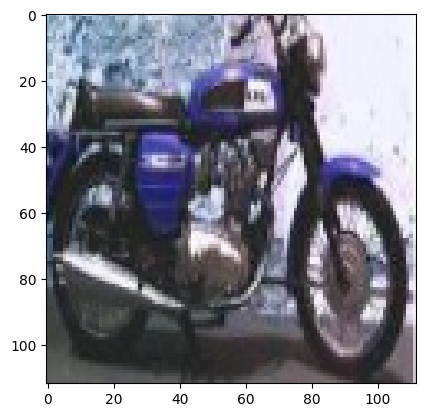

In [33]:
idx = np.random.randint(0, images.shape[0], 1)[0]
print(idx)

plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))

In [38]:
# images, labels -> x_train, y_train, x_test, y_test로 split
x_train, x_test, y_train, y_test = train_test_split(images, labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3257, 112, 112, 3), (1086, 112, 112, 3), (3257,), (1086,))

In [39]:
import albumentations as A
from tqdm import tqdm

In [41]:
def augment_images(images, labels, num_augments=1):
    """
    이미지와 레이블 데이터 증강

    Args:
        images: (N, H, W, C)
        labels: (N,)
        num_augments: 이미지당 증강 수
    Returns:
        aug_images: (N*num_augments, H, W, C)
        aug_labels: (N*num_augments,)
    """
    """
    transform = A.Compose([
        A.RandomRotate90(p=0.4),
        A.HorizontalFlip(p=0.4),
        A.RandomBrightnessContrast(p=0.4),
        A.OneOf([
            A.GaussNoise(p=0.2),
            A.GaussianBlur(p=1),
        ], p=0.2),
        A.VerticalFlip(p=0.5),
        A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.5),
        A.MotionBlur(blur_limit=5, p=0.3)
        ])
    """
    transform = A.Compose([
        A.HorizontalFlip(p=1.0),
        A.GaussianBlur(blur_limit=7, p=1.0),
        A.GaussNoise(var_limit=(20.0, 50.0), p=1.0),
        A.RandomBrightnessContrast(p=1.0)
        ])

    augmented_images = []
    augmented_labels = []

    for img, label in zip(tqdm(images.astype('uint8')), labels):
        for _ in range(num_augments):
            augmented = transform(image=img)['image']
            augmented_images.append(augmented)
            augmented_labels.append(label)

    augmented_images = np.array(augmented_images).astype('int8')
    augmented_labels = np.array(augmented_labels)

    return augmented_images, augmented_labels

# 사용 예시
aug_images, aug_labels = augment_images(x_train, y_train, num_augments=1)

<ipython-input-41-7c40704e83ec>:30: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(20.0, 50.0), p=1.0),
100%|██████████| 3257/3257 [00:04<00:00, 766.02it/s]


In [66]:
augment_images(images, labels)

<ipython-input-41-7c40704e83ec>:30: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(20.0, 50.0), p=1.0),


AttributeError: 'list' object has no attribute 'astype'

In [47]:
aug_images.shape, aug_labels.shape

((3257, 112, 112, 3), (3257,))

In [48]:
x_train_tot = np.concatenate((x_train, aug_images), axis=0)
y_train_tot = np.concatenate((y_train, aug_labels), axis=0)
x_train_tot.shape, y_train_tot.shape

((6514, 112, 112, 3), (6514,))

## Zero Centering

testset에 대해서도 별도의 testset의 평균 이미지를 구하는게 맞을까?
- trainset은 trainset의 평균이미지로 제로센터링하고, testset은 testset의 평균이미지로 제로센터링? 과연 맞을까?

- 실제 데이터들의 평균을 계산할 수 없기 때문에, 테스트할 때도 고의적으로 테스트셋의 평균을 계산하지 않고, 학습데이터의 평균이미지로 제로센터링을 수행하여 성능을 평가한다.
- 연습은 실전처럼!

In [ ]:
# trainset = train_평균
# testset = train_평균

In [49]:
# zero-centering
# compute_mean = lambda imgs : np.mean(imgs, axis=0)
# 평균 이미지 계산 함수
def compute_mean(imgs):
    return np.mean(imgs, axis=0)  # (N, H, W, C) -> (H, W, C)

In [50]:
# trainset으로 mean_img 계산
mean_img = compute_mean(x_train_tot)
mean_img.shape
zero_mean_img = mean_img.astype('int8') # 메모리 문제로 int8로 변환(근사값으로 사용)
x_train_tot = x_train_tot.astype('int8')
x_test = x_test.astype('int8')

In [51]:
# trainset zero centering
x_train_tot -= zero_mean_img
# testset zero centering
x_test -= zero_mean_img

In [52]:
x_train_tot.shape, x_test.shape

((6514, 112, 112, 3), (1086, 112, 112, 3))

In [53]:
y_train_tot.shape, y_test.shape

((6514,), (1086,))

In [ ]:
# trainset으로 mean_img 계산




In [ ]:
#trainset zero centering



In [ ]:
# # testset zero centering



In [ ]:
# 메모리 문제가 있다면 int8로 변환(근사값으로 사용)
zero_mean_img = zero_mean_img.astype('int8')

## albumentation을 활용한 증강 (10장)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
import albumentations as A
import numpy as np

In [ ]:
def augment_images(images, labels, num_augments=1):
    """
    주어진 이미지 데이터셋에서 지정된 수만큼 증강된 이미지를 생성

    Args:
        images: numpy array, 입력 이미지 데이터셋 (N, h, w, c)
        num_aug: int, 생성할 증강 이미지 수 (기본값: 1)

    Returns:
        numpy array: 증강된 이미지들 (num_aug, h, w, c)
    """

    transform = A.Compose([
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.OneOf([
            A.GaussNoise(p=0.1),
            A.GaussianBlur(p=1),
        ], p=0.3),
    ]) # OneOf는 둘중에 하나 선택

    augmented_images = []
    augmented_labels = []

    images = images.astype('uint8')  # 먼저 uint8로 바꾸고
    for img, label in zip(images, labels):
        for _ in range(num_augments):
            augmented = transform(image=img)['image']
            augmented_images.append(augmented)
            augmented_labels.append(label)

    augmented_images = np.array(augmented_images).astype('int8')
    augmented_labels = np.array(augmented_labels)

    return augmented_images, augmented_labels

aug_images, aug_labels = augment_images(x_train, y_train, num_augments=3)

In [ ]:
aug_images.shape, aug_labels.shape

((5174, 224, 224, 3), (5174,))

## 데이터 저장

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# 각자 원하는 드라이브 경로에 맞게 수정합시다.
folder_path = '/content/drive/MyDrive/testset/'

In [73]:
with open(folder_path+'x_train.pickle', 'wb') as f:
    pickle.dump(x_train, f)

In [74]:
with open(folder_path+'y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

In [75]:
with open(folder_path+'x_test.pickle', 'wb') as f:
    pickle.dump(x_test, f)

In [76]:
with open(folder_path+'y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

## 데이터 다운로드(gdown)

`!gdown`
* 구글 드라이브에서 파일을 다운로드하는 명령어이다.



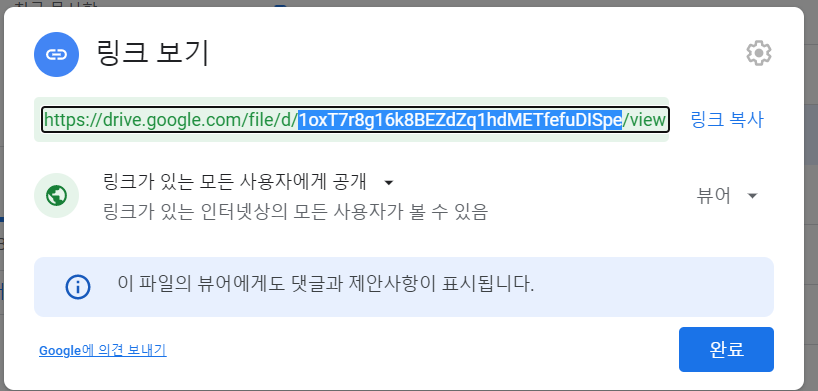

* gdown 뒤에 파일 아이디를 입력한다.
* 파일아이디는 파일 링크에서 d와 view 사이에 있는 문자에 해당한다.

In [ ]:
# x_train
!gdown 158wGhDi741wVLY6QFY5G_ti6Gsm9Ygqq

# y_train
!gdown 13_XDA8AGCnOTQ_J1NFwz9LVduQEdG_9r

# x_test
!gdown 1d350cfCFVL6F146lO8AF5DQYauAFfMHI

# y_test
!gdown 14ygmP6cqQd51s-Hklo4QHubatkR4p9ex

Downloading...
From (original): https://drive.google.com/uc?id=158wGhDi741wVLY6QFY5G_ti6Gsm9Ygqq
From (redirected): https://drive.google.com/uc?id=158wGhDi741wVLY6QFY5G_ti6Gsm9Ygqq&confirm=t&uuid=ec9f881c-9178-44a9-ab16-fdbb7cf3930d
To: /content/x_train.pickle
100% 779M/779M [00:11<00:00, 69.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=13_XDA8AGCnOTQ_J1NFwz9LVduQEdG_9r
To: /content/y_train.pickle
100% 41.5k/41.5k [00:00<00:00, 77.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1d350cfCFVL6F146lO8AF5DQYauAFfMHI
From (redirected): https://drive.google.com/uc?id=1d350cfCFVL6F146lO8AF5DQYauAFfMHI&confirm=t&uuid=b4a7924a-4230-457b-92af-7ef86043dfc1
To: /content/x_test.pickle
100% 260M/260M [00:03<00:00, 71.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=14ygmP6cqQd51s-Hklo4QHubatkR4p9ex
To: /content/y_test.pickle
100% 14.0k/14.0k [00:00<00:00, 36.6MB/s]


In [ ]:
# pickle 로딩해서 확인하기
import pickle

# 로드
with open('x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [54]:
# 타입과 shape 확인
print("x_train:", type(x_train), getattr(x_train, 'shape', None))
print("y_train:", type(y_train), getattr(y_train, 'shape', None))
print("x_test :", type(x_test), getattr(x_test, 'shape', None))
print("y_test :", type(y_test), getattr(y_test, 'shape', None))

x_train: <class 'numpy.ndarray'> (3257, 112, 112, 3)
y_train: <class 'numpy.ndarray'> (3257,)
x_test : <class 'numpy.ndarray'> (1086, 112, 112, 3)
y_test : <class 'numpy.ndarray'> (1086,)


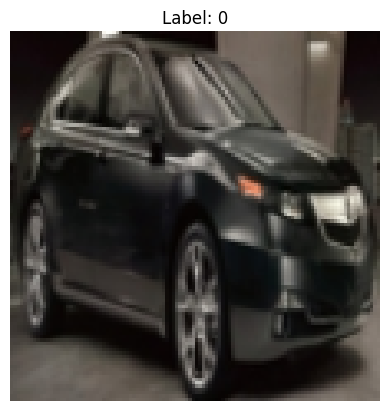

In [55]:
# 데이터 시각화
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

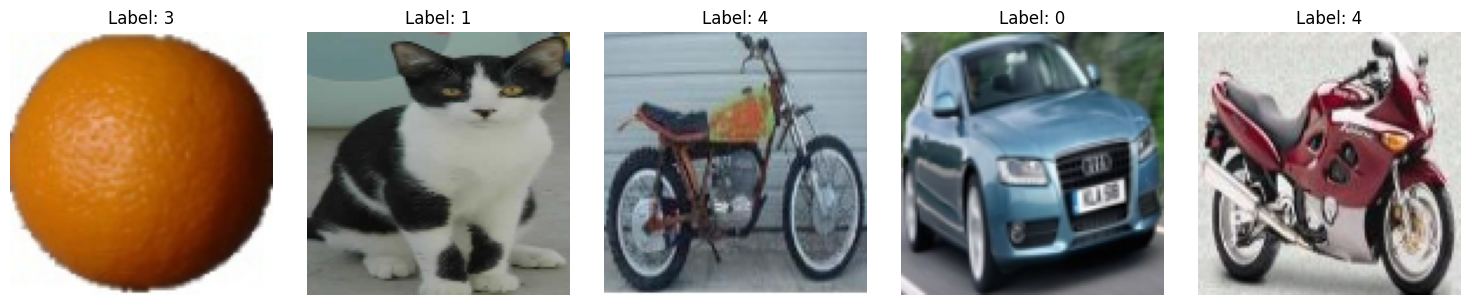

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 한 번에 n장 시각화
n = 5
indices = random.sample(range(len(x_train)), n)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    plt.subplot(1, n, i+1)
    img = x_train[idx]

    # 이미지 형식 맞춰서 표시 (보통 0~1로 정규화된 float32일 경우)
    if img.max() <= 1.0:
        plt.imshow(img)
    else:
        plt.imshow(img.astype(np.uint8))

    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [57]:
# 그리드로 배치해 보기
import matplotlib.pyplot as plt
import numpy as np
import random

n_rows = 10
n_cols = 5
n_images = n_rows * n_cols # 이미지 배치 행렬수

indices = random.sample(range(len(x_train)), n_images)

plt.figure(figsize=(n_cols * 2, n_rows * 2))  # 적당히 키우기

for i, idx in enumerate(indices):
    plt.subplot(n_rows, n_cols, i + 1)
    img = x_train[idx]

    # 이미지 타입 확인 및 표시
    if len(img.shape) == 2:  # grayscale
        plt.imshow(img, cmap='gray')
    elif img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img if img.max() <= 1.0 else img.astype(np.uint8))

    plt.title(str(y_train[idx]), fontsize=8) # 제목이 너무 크지 않게 조정
    plt.axis('off')

plt.tight_layout() # 그래프간 여백 자동정리
plt.show()

Output hidden; open in https://colab.research.google.com to view.

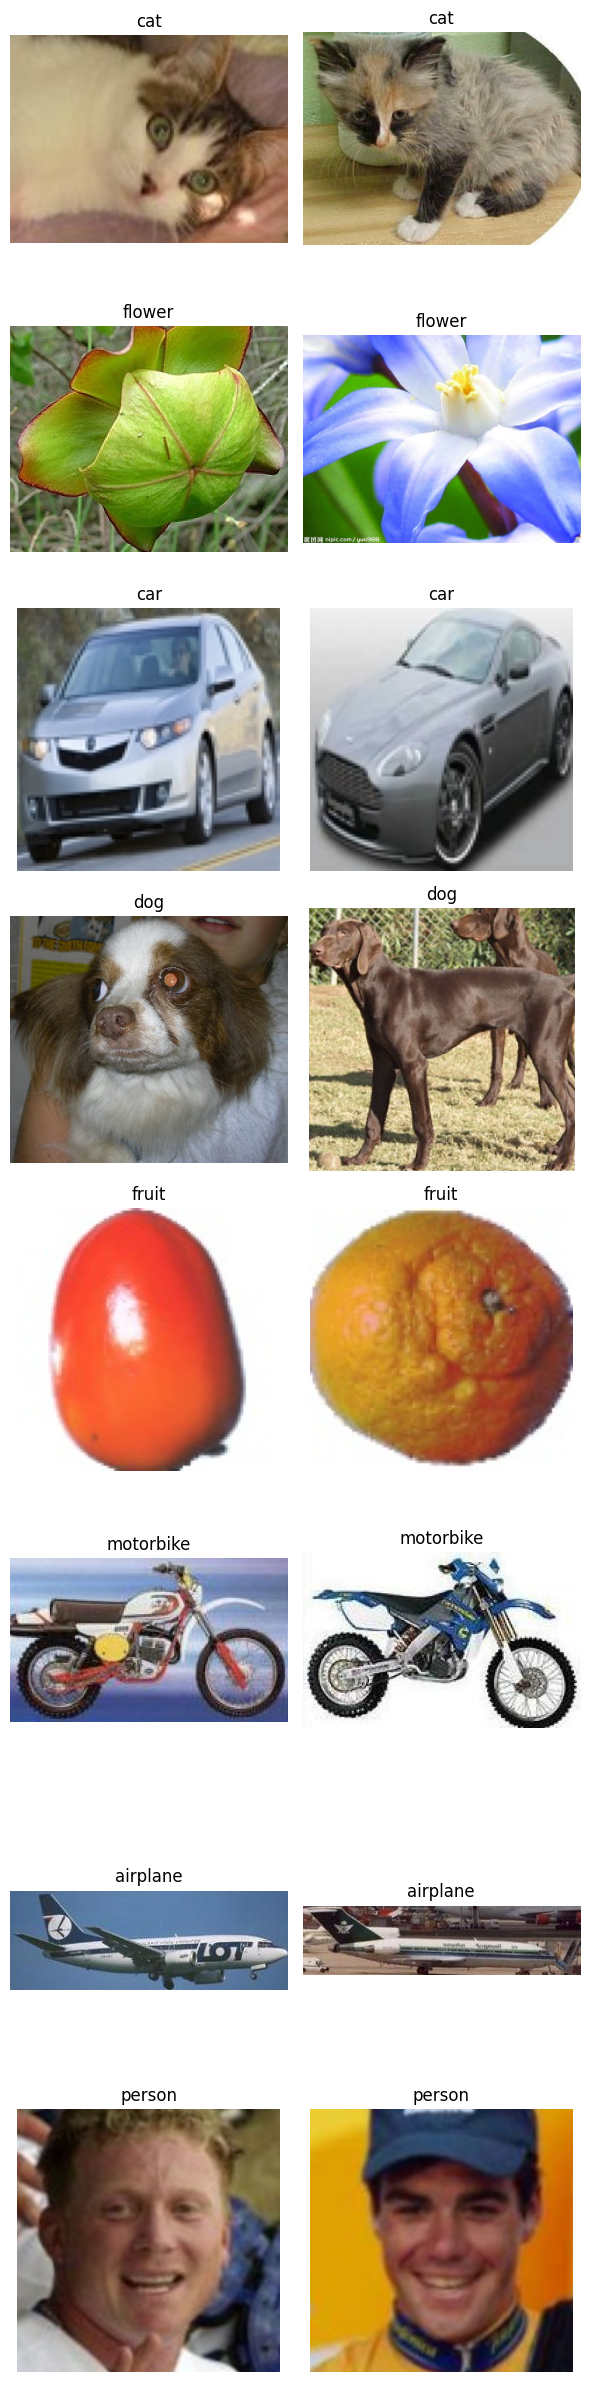

In [58]:
# 전처리 전 이미지 로드 및 탐색
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# 데이터 경로
data_path = '/content/natural_images'
classes = os.listdir(data_path)

# 예: 각 클래스에서 1장씩 무작위로 뽑기
n_per_class = 2  # 클래스당 몇 장씩 볼지

plt.figure(figsize=(n_per_class * 3, len(classes) * 3))

for i, cls in enumerate(classes):
    class_dir = os.path.join(data_path, cls)
    images = os.listdir(class_dir)
    sample_images = random.sample(images, n_per_class)

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)

        plt.subplot(len(classes), n_per_class, i * n_per_class + j + 1)
        plt.imshow(img)
        plt.title(f"{cls}")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [60]:
# 원본 이미지 x_original 형태로 가져오기
import numpy as np

x_original = []
y_original = []

for label, cls in enumerate(classes):
    class_dir = os.path.join(data_path, cls)
    images = os.listdir(class_dir)

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path).resize((112, 112))  # 크기 통일
        img_array = np.array(img)

        x_original.append(img_array)
        y_original.append(label)

x_original = np.array(x_original)
y_original = np.array(y_original)

In [61]:
# 정규화
x_processed = x_original / 255.0  # float32로 바꾸는 것도 고려 가능

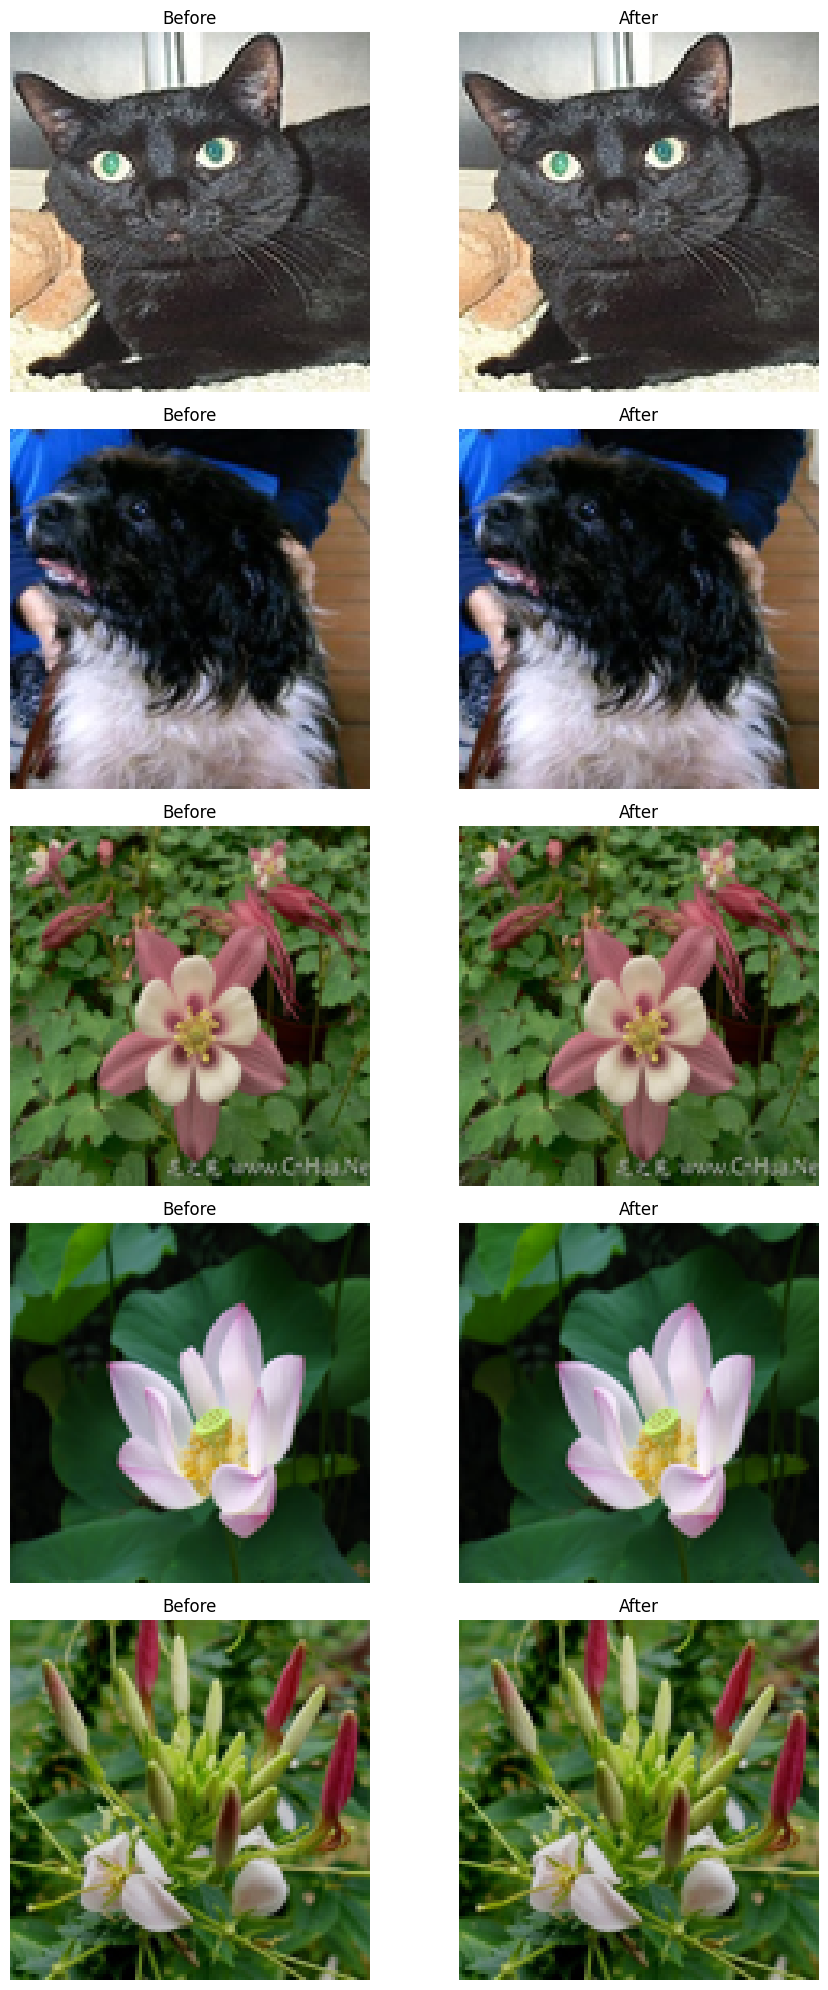

In [62]:
import matplotlib.pyplot as plt
import random
import numpy as np

# 샘플 수
n = 5
indices = random.sample(range(len(x_processed)), n)

plt.figure(figsize=(10, 4 * n))  # 각 이미지 쌍마다 두 줄씩 확보

for i, idx in enumerate(indices):
    # 전처리 전
    plt.subplot(n, 2, 2*i + 1)
    img = x_original[idx]
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    elif img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img if img.max() <= 1.0 else img.astype(np.uint8))
    plt.title("Before")
    plt.axis('off')

    # 전처리 후
    plt.subplot(n, 2, 2*i + 2)
    img = x_processed[idx]
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    elif img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img if img.max() <= 1.0 else img.astype(np.uint8))
    plt.title("After")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/project_data/x_train.pkl'